### 2개의 층으로 심층 신경망 구성

In [3]:
import tensorflow as tf
from tensorflow import keras

from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

In [4]:
from sklearn.model_selection import train_test_split
train_scaled = train_input/255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

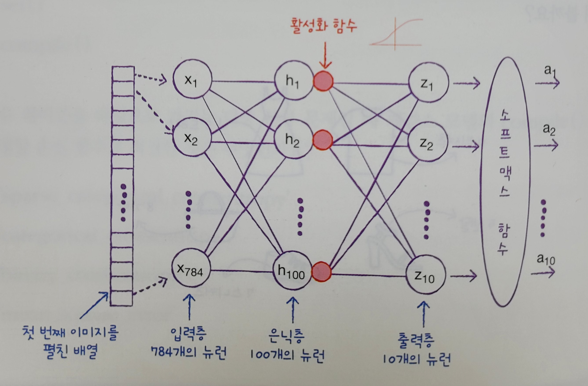

- 입력층과 출력층 사이에 밀집층이 추가 ==> 은닉층(hidden layer)
- 은닉층에는 주황색 원으로 활성화 함수가 표시
    - 활성화 함수는 신경망 층의 선형 방정식의 계산값에 적용하는 함수
    - 기존에 등장했던, softmax 함수도 활성화 함수
    - 은닉층의 활성화 함수는 비교적 자유롭게 선택(시그모이드 함수/렐루 함수)
    - 그러면, 왜 **은닉층에 활성화 함수를 적용할까?**
  
      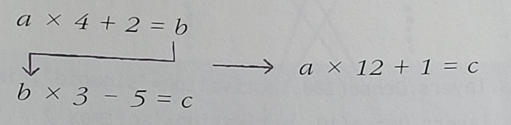
        - 위와 같이 합쳐지면, b는 사라지게 됨(b가 하는 일이 없는셈)
        - 단순히 선형적인 산술 계산만 수행 + 비선형적인 역할(아래)
          
        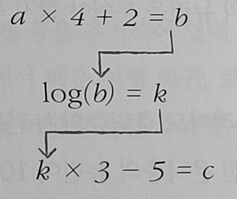
        
- 출력층에 적용하는 활성화 함수
    - 이진분류: 시그모이드 함수
    - 다중분류: 소프트맥스 함수
- 회귀일 경우, 활성화 함수를 적용할 필요없음.
    - 출력층의 선형 방정식의 계산을 그대로 출력
    - Dense 층의 activation 매개변수에 아무런 값도 지정하지 않는다.

In [9]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden')
dense2 = keras.layers.Dense(10, activation='softmax', name='output')

- dense1: 은닉층
    - 100개의 뉴런을 가진 밀집층
    - 활성화 함수: sigmoid
    - 몇 개의 뉴런을 두어야 할지 판단하기 위해서는 **상당한 경험**이 필요
    - 출력층(dense2)보다는 **뉴런을 많게** 만들어야 한다. ==> 10개의 클래스를 예측해야 하는데, 10개보다 적다면 부족한 정보 전달
- dense2: 출력층
    - 10개의 클래스를 분류(10개의 뉴런을 설정)
    - 활성화 함수: softmax

---
### 심층 신경망 만들기
- dense1, dense2 객체를 Sequential 클래스에 추가하여 DNN 생성
- 여러개의 층을 추가 시, 리스트[ ] 형태로 전달
- 출력층을 가장 나중에 생성

In [10]:
model = keras.Sequential([dense1, dense2])

### 층에 대한 유용한 정보 확인

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### 첫번째 층의 출력의 크기 분석
- 1) (None, 100)
    - 첫번째(None)은 샘플의 개수: 아직 정의되어 있지 않기 때문에 None
        - **왜** 그럴까?
        - 데이터를 한 번에 모두 사용하지 않고 잘게 나누어 여러 번에 걸쳐 경사 하강법 단계 수행. ==> 미니배치 경사 하강법
        - 기본 미니배치 크기: 32개
        - fit() 메서드 / batch_size 매개변수로 변경 가능
    - 두번째(100): 100개의 출력이 나오게끔 설정
        - 즉, 샘플마다 784개의 픽셀값이 은닉층을 통과하면서 100개의 특성으로 압축
- 2) 78500
    - 모델 파라미터 개수가 출력
    - 입력 픽셀 784개와 100개의 모든 조합에 대한 가중치, 그리고 뉴런마다 1개의 절편이 있음
    - 784 * 100 + 100 = 78500
    
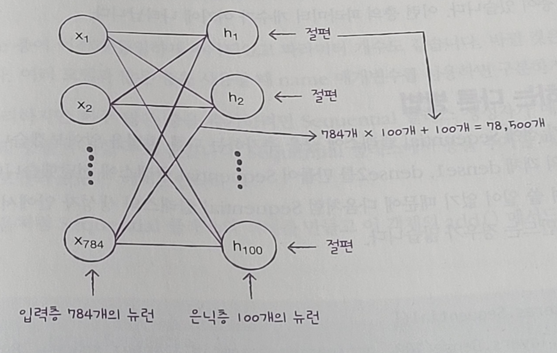

### 두번째 층의 출력의 크기 분석
- 1) (None, 10)
    - 배치차원은 동일하게 None
    - 출력 뉴런 개수: 10
- 2) 1010
    - 모델 파라미터 개수가 출력
    - 100 * 10 + 10 = 1010
    
    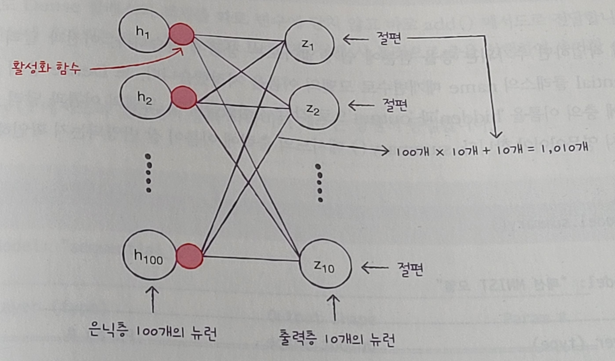

### 마지막: 총 모델 파라미터 개수 + 훈련되는 파라미터 개수
- 78500 + 1010 = 79510
- 훈련되지 않는 파라미터(간혹 경사 하강법으로 훈련되지 않는 파라미터를 가진 층이 존재할 경우, 여기에 표현)